In [134]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/proden/Code/PolaritonPerturbationTheory/perturbative_methods.py:519: SyntaxWarning: invalid escape sequence '\l'
  """
/Users/proden/Code/PolaritonPerturbationTheory/perturbative_methods.py:934: SyntaxWarning: invalid escape sequence '\l'
  """
/Users/proden/Code/PolaritonPerturbationTheory/perturbative_methods.py:1043: SyntaxWarning: invalid escape sequence '\l'
  """


In [135]:
# import libraries
import numpy as np
import sys
import psi4
np.set_printoptions(threshold=sys.maxsize)
psi4.core.set_output_file('output.dat', False)
import time
import json
import matplotlib.pyplot as plt
import json
import os

# import libraries
import numpy as np
import sys
import psi4
np.set_printoptions(threshold=sys.maxsize)
psi4.core.set_output_file('output.dat', False)
import time
import json
import matplotlib.pyplot as plt
import json


In [ ]:
import numpy as np
from numba import jit



@jit(nopython=True)
def delta(i, j):
    return 1 if i == j else 0


@jit(nopython=True)
def calc_fourth_order_energy_correction(d_matrix,energies, n_elec, omega, mu_n, m_n):

    E_n_4_part_1 = 0

    for mu_p in range(0, n_elec):

        for mu_q in range(0,n_elec):

            for mu_r in range(0, n_elec):
            
                for m_p in range(max(0, m_n-1), m_n+2):  

                    for m_q in range(max(0,m_n-1), m_n+2):

                        for m_r in range(max(0,m_n-1), m_n+2):
                        
                            if((mu_p == mu_n and m_p == m_n) or (mu_q == mu_n and m_q == m_n) or (mu_r == mu_n and m_r == m_n)):
                                pass
                            else:
                                #do stuff
                                first_part_first_term = (-np.sqrt(omega/2)) *  ((d_matrix[mu_n][mu_p])*(np.sqrt(m_p + 1) * delta(m_n, m_p+1) + np.sqrt(m_p) * delta(m_n, m_p-1)  ))


                                second_part_first_term = 0
                                for gamma in range(0, n_elec):
                                    second_part_first_term +=  d_matrix[mu_n][gamma]*d_matrix[gamma][mu_p] * delta(m_n, m_p)

                                first_term =  first_part_first_term + (0.5*second_part_first_term)


                                first_part_second_term = (-np.sqrt(omega/2)) * ((d_matrix[mu_p][mu_q])*(np.sqrt(m_q + 1) * delta(m_p, m_q+ 1) + np.sqrt(m_q) * delta(m_p, m_q-1)  ))

                                second_part_second_term = 0
                                for gamma in range(0, n_elec):
                                    second_part_second_term +=  d_matrix[mu_p][gamma]*d_matrix[gamma][mu_q]* delta(m_p, m_q)

                                second_term = first_part_second_term + (0.5*second_part_second_term)


                                first_part_third_term = (-np.sqrt(omega/2)) * ((d_matrix[mu_q][mu_r])*(np.sqrt(mu_r + 1) * delta(m_q, m_r+1) + np.sqrt(mu_r) * delta(m_q, m_r-1)  ))

                                second_part_third_term = 0
                                for gamma in range(0, n_elec):
                                    second_part_third_term +=  d_matrix[mu_q][gamma]*d_matrix[gamma][mu_r] * delta(m_q, m_r)
                                third_term = first_part_third_term+ (0.5*second_part_third_term)


                                first_part_fourth_term = (-np.sqrt(omega/2)) * ((d_matrix[mu_r][mu_n])*(np.sqrt(mu_n + 1) * delta(m_r, m_n+1) + np.sqrt(mu_n) * delta(m_r, m_n-1)  ))

                                second_part_fourth_term = 0
                                for gamma in range(0, n_elec):
                                    second_part_fourth_term +=  d_matrix[mu_r][gamma]*d_matrix[gamma][mu_n] * delta(m_r, m_n)

                                fourth_term = first_part_fourth_term + (0.5*second_part_fourth_term)

                                E_n_4_part_1 += (first_term*second_term*third_term * fourth_term) / ( ( energies[mu_n] + (m_n*omega) - energies[mu_p] - (m_p*omega)   ) *  (energies[mu_n] + (m_n*omega) - energies[mu_q] - (m_q*omega)  ) *  (energies[mu_n] + (m_n*omega) - energies[mu_r] - (m_r*omega) ))
                                


    E_n_4_part_2 = 0

    E_n_4_part_2_part1 = 0
    E_n_4_part_2_part2 = 0
    for mu_l in range(0, n_elec):

        #for m_l in range(max(m_n-1,0), m_n+2):
        for m_l in range(max(0, m_n-1), m_n+2 ):

            if(mu_l == mu_n and m_l == m_n):
                pass
            else:

                sum_over_energy_states_gamma = 0
                for gamma in range(0, n_elec):
                    #numerator += d_matrix[gamma][mu_l]*d_matrix[mu_l][gamma]
                    sum_over_energy_states_gamma += (d_matrix[mu_l][gamma]*d_matrix[gamma][mu_n] * delta(m_l, m_n))

                E_n_4_part_2_part1  += ((((-np.sqrt(omega/2)) * d_matrix[mu_l][mu_n] * (np.sqrt(m_n +1) * delta(m_l, m_n + 1)  + np.sqrt(m_n) * delta(m_l, m_n-1)) ) + (0.5 * sum_over_energy_states_gamma))**2   )         /       (energies[mu_n] + (m_n * omega) - energies[mu_l] - (m_l * omega))
                E_n_4_part_2_part2  += ((((-np.sqrt(omega/2)) * d_matrix[mu_l][mu_n] * (np.sqrt(m_n +1) * delta(m_l, m_n + 1)  + np.sqrt(m_n) * delta(m_l, m_n-1)) ) + (0.5 * sum_over_energy_states_gamma))**2   )         /       (energies[mu_n] + (m_n * omega) - energies[mu_l] - (m_l * omega))**2
    
    E_n_4_part_2 = E_n_4_part_2_part1 * E_n_4_part_2_part2




    E_n_4_part_3 = 0
    E_n_4_part_3_part1 = 0
    E_n_4_part_3_part2 = 0
    for gamma in range(0, n_elec):
       E_n_4_part_3_part1+= d_matrix[mu_n][gamma]*d_matrix[gamma][mu_n]

    E_n_4_part_3_part1 = (1 / 2 )* E_n_4_part_3_part1


    for mu_p in range(0, n_elec):

        for mu_q in range(0,n_elec):
            
            for m_p in range(max(0, m_n-1), m_n+2):  

                for m_q in range(max(0,m_n-1), m_n+2):
                    
                    if((mu_p == mu_n and m_p == m_n) or (mu_q == mu_n and m_q == m_n)):
                        pass
                    else:

            
                        #do stuff
                        first_part_first_term =(-np.sqrt(omega/2)) * ((d_matrix[mu_n][mu_p])*(np.sqrt(m_p + 1) * delta(m_n, m_p+1) + np.sqrt(m_p) * delta(m_n, m_p-1)  ))


                        second_part_first_term = 0
                        for gamma in range(0, n_elec):
                            second_part_first_term +=  d_matrix[mu_n][gamma]*d_matrix[gamma][mu_p] * delta(m_n, m_p)

                        first_term =  first_part_first_term + (0.5*second_part_first_term)


                        first_part_second_term =  (-np.sqrt(omega/2)) *  ((d_matrix[mu_p][mu_q])*(np.sqrt(m_q + 1) * delta(m_p, m_q+ 1) + np.sqrt(m_q) * delta(m_p, m_q-1)  ))

                        second_part_second_term = 0
                        for gamma in range(0, n_elec):
                            second_part_second_term +=  d_matrix[mu_p][gamma]*d_matrix[gamma][mu_q]* delta(m_p, m_q)

                        second_term = first_part_second_term + (0.5*second_part_second_term)


                        first_part_third_term = (-np.sqrt(omega/2)) *  ((d_matrix[mu_q][mu_n])*(np.sqrt(mu_n + 1) * delta(m_q, m_n+1) + np.sqrt(mu_n) * delta(m_q, m_n-1)  ))

                        second_part_third_term = 0
                        for gamma in range(0, n_elec):
                            second_part_third_term +=  d_matrix[mu_q][gamma]*d_matrix[gamma][mu_n] * delta(m_q, m_n)
                        third_term = first_part_third_term + (0.5*second_part_third_term)


                        E_n_4_part_3_part2 += (first_term*second_term*third_term) / ( (( energies[mu_n] + (m_n*omega) - energies[mu_p] - (m_p*omega)   )**2) *  (energies[mu_n] + (m_n*omega) - energies[mu_q] - (m_q*omega)  )   )

    E_n_4_part_3 =  2* E_n_4_part_3_part1 * E_n_4_part_3_part2




    E_n_4_part_4 = 0

    E_n_4_part_4_part1 = 0
    E_n_4_part_4_part2 = 0

    for gamma in range(0, n_elec):
       E_n_4_part_4_part1+= d_matrix[mu_n][gamma]*d_matrix[gamma][mu_n]

    E_n_4_part_4_part1 = ((1 / 2 )* E_n_4_part_4_part1)**2


    for mu_l in range(0, n_elec):

        #for m_l in range(max(m_n-1,0), m_n+2):
        for m_l in range(max(0, m_n-1), m_n+2 ):

            if(mu_l == mu_n and m_l == m_n):
                pass
            else:

                sum_over_energy_states_gamma = 0
                for gamma in range(0, n_elec):
                    #numerator += d_matrix[gamma][mu_l]*d_matrix[mu_l][gamma]
                    sum_over_energy_states_gamma += (d_matrix[mu_l][gamma]*d_matrix[gamma][mu_n] * delta(m_l, m_n))

                E_n_4_part_4_part2  += ((((-np.sqrt(omega/2)) * d_matrix[mu_l][mu_n] * (np.sqrt(m_n +1) * delta(m_l, m_n + 1)  + np.sqrt(m_n) * delta(m_l, m_n-1)) ) + (0.5 * sum_over_energy_states_gamma))**2   )         /       (energies[mu_n] + (m_n * omega) - energies[mu_l] - (m_l * omega))**3
    
    E_n_4_part_4 = E_n_4_part_4_part1 * E_n_4_part_4_part2




    E_n_4 = E_n_4_part_1 - E_n_4_part_2 - E_n_4_part_3 + E_n_4_part_4
    return E_n_4




class non_degen_pt:


    def __init__(self, energies, dipoles , lambda_vec, omega, n_elec, mu_n, m_n, coherent_state = False, upper_triangular_d_matrix = False):
        self.E_array = energies[:n_elec]
        self.dipoles = dipoles
        self.omega = omega
        self.n_el = n_elec
        self.lambda_vec = lambda_vec
        self.state_index = mu_n
        self.m_n = m_n
        self.coherent_state = coherent_state
        self.upper_triangular = upper_triangular_d_matrix


        self.build_d_array(self.n_el, self.lambda_vec, self.dipoles, coherent_state=self.coherent_state, upper_triangular_Mu_array=self.upper_triangular)


    def compute_first_order_energy_correction(self,n_el, state_index = 0):
        # defaults to the ground state
        _N = state_index
       
        # einsum
        E_n_1_es = np.einsum("i,i->", self.d_array[_N,:], self.d_array[:,_N], optimize=True)
        
        self.first_order_energy_correction = 0.5 * E_n_1_es


    def compute_second_order_energy_correction(self, n_el, omega, E_array, state_index = 0):


        # defaults to ground electronic state
        mu_n = state_index

        # prepare inverse E_mu_n - E_mu_m array
        E_mn = np.zeros_like(E_array)
        E_mn_min_omega = np.zeros_like(E_array)


        E_mn[1:] = 1 / (E_array[mu_n] - E_array[1:])
        E_mn_min_omega = 1 / (E_array[mu_n] - E_array - omega)
        E_mn_plus_omega = 1 / (E_array[mu_n] - E_array + omega)

        E_mn[E_mn == np.inf] = 0
        E_mn_min_omega[E_mn_min_omega == np.inf] = 0
        E_mn_plus_omega[E_mn_plus_omega == np.inf] = 0

        # take element-by-element square of d_matrix for the sum
        _blc_tmp = omega / 2 * self.d_array[:,mu_n] * self.d_array[:,mu_n] * E_mn_min_omega * np.sqrt(self.m_n + 1)

        # sum numerator and denominator of blc term 1 separately
        _blc_es = np.einsum("i->", _blc_tmp, optimize=True)

        # take element-by-element square of d_matrix for the sum
        _blc_tmp_2 = omega / 2 * self.d_array[:,mu_n] * self.d_array[:,mu_n] * E_mn_plus_omega * np.sqrt(self.m_n)

        # sum numerator and denominator of blc term 1 separately
        _blc_es_2 = np.einsum("i->", _blc_tmp_2, optimize=True)
        
        
        # first perform contraction over gamma for all values of mu_M
        _dse_tmp = np.einsum("ij,j->i", self.d_array, self.d_array[:,mu_n], optimize=True)

        # exclude the mu_M = mu_N term
        _dse_tmp[mu_n] = 0
        
        # now compute the square of the summed terms in the numerator and the difference of terms in denominator
        _dse_tmp2 = _dse_tmp * _dse_tmp * E_mn

        
        _dse_es = 1 / 4 * np.einsum("i->", _dse_tmp2, optimize=True)


        self.second_order_energy_correction = _blc_es + _blc_es_2 + _dse_es 


    def compute_third_order_ddd(self, n_el, E_array, state_index=0):
        """
        Helper function that compute the third order correction 
        <N|dd|P><P|dd|Q><Q|dd|N>/[(EN - EP) * (EN-EQ)]
        that contains only DSE terms that arise when m_N = m_P = m_Q = 0
        """
        _N = 0

        # calculate some intermediates
        
        # contract over g for the <N|dd|P> and <Q|dd|N> terms, which 
        # yield the same vector
        A = np.einsum("g, gp -> p", self.d_array[_N,:], self.d_array, optimize=True)

        # contract over g for the <P|DD|Q> term, which yields a matrix
        B = np.einsum("pg, gq -> pq", self.d_array, self.d_array, optimize=True)

        # get the energy difference for the denominator
        delta_E = E_array[_N] - E_array

        # Form A / delta_E terms and store in A_tilde
        A_tilde = np.zeros_like(A)
        A_tilde[1:] = A[1:] / delta_E[1:]

        # now perform the sums in two steps:
        # Step 1 is the contraction of B[pq] * A_tilde[q]
        _t1 = np.einsum("pq,q->p", B, A_tilde)
        # Step 2 is the contraction of A_tilde[p] * _t1[p]
        self.third_order_ddd =(1/8) * np.einsum("p,p->", A_tilde, _t1)

    
    
    def compute_third_order_bdb(self, n_el, E_array, state_index=0):
        """
        Helper function that compute the third order correction 
        <N|b|P><P|dd|Q><Q|b|N>/[(EN - EP) * (EN-EQ)]
        that contains product of BLC * DSE *DSE  terms that arise when m_p = m_q =/ m_n
        """
        _N = state_index

        # calculate some intermediates

        A = self.d_array[_N, : ]

        # contract over g for the <P|DD|Q> term, which yields a matrix
        B = np.einsum("pg, gq -> pq", self.d_array, self.d_array, optimize=True)

        # get the energy difference for the denominator
        delta_E = E_array[_N] - E_array - self.omega
        delta_E[delta_E == 0] = np.inf

        # Form A / delta_E terms and store in A_tilde
        A_tilde = np.zeros_like(A)
        A_tilde = A/ delta_E

        # now perform the sums in two steps:
        # Step 1 is the contraction of B[pq] * A_tilde[q]
        _t1 = np.einsum("pq,q->p", B, A_tilde)
        # Step 2 is the contraction of A_tilde[p] * _t1[p]
        self.third_order_bdb =  ((self.omega*(self.m_n +1) )/4)   *   np.einsum("p,p->", A_tilde, _t1)




        # get the energy difference for the denominator
        delta_E = E_array[_N] - E_array + self.omega
        delta_E[delta_E == 0] = np.inf

        # Form A / delta_E terms and store in A_tilde
        A_tilde = np.zeros_like(A)
        A_tilde = A/ delta_E

        # now perform the sums in two steps:
        # Step 1 is the contraction of B[pq] * A_tilde[q]
        _t1 = np.einsum("pq,q->p", B, A_tilde)
        # Step 2 is the contraction of A_tilde[p] * _t1[p]
        self.third_order_bdb +=  ((self.omega*self.m_n)/4)   *   np.einsum("p,p->", A_tilde, _t1)



    def compute_third_order_bbd(self, n_el, E_array, state_index=0):
        """
        Helper function that compute the third order correction 
        <N|b|P><P|b|Q><Q|dd|N>/[(EN - EP) * (EN-EQ)]
        that contains product of BLC * DSE *DSE  terms that arise when m_p = m_q =/ m_n
        """
        _N = 0

        # calculate some intermediates

        A = np.einsum("g, gp -> p",self.d_array[_N,:], self.d_array, optimize = True )

        A_2 = self.d_array[_N , :]

        # contract over g for the <P|DD|Q> term, which yields a matrix
        B = self.d_array

        # get the energy difference for the denominator
        delta_E_1 = E_array[_N] - E_array - self.omega
        delta_E_2 = E_array[_N] - E_array

        delta_E_1[delta_E_1 == 0] = np.inf
        delta_E_2[delta_E_2 == 0] = np.inf


        # Form A / delta_E terms and store in A_tilde
        A_tilde_2 = A_2/ delta_E_1


        # Form A / delta_E terms and store in A_tilde
        A_tilde_1 = A / delta_E_2

        # now perform the sums in two steps:
        # Step 1 is the contraction of B[pq] * A_tilde[q]
        _t1 = np.einsum("pq,q->p", B, A_tilde_2)
        # Step 2 is the contraction of A_tilde[p] * _t1[p]
        self.third_order_bbd =  ((self.omega * (self.m_n+1))/4)   *   np.einsum("p,p->", A_tilde_1, _t1)




        # get the energy difference for the denominator
        delta_E_1 = E_array[_N] - E_array + self.omega
        delta_E_2 = E_array[_N] - E_array

        delta_E_1[delta_E_1 == 0] = np.inf
        delta_E_2[delta_E_2 == 0] = np.inf


        # Form A / delta_E terms and store in A_tilde
        A_tilde_2 = A_2/ delta_E_1


        # Form A / delta_E terms and store in A_tilde
        A_tilde_1 = A / delta_E_2

        # now perform the sums in two steps:
        # Step 1 is the contraction of B[pq] * A_tilde[q]
        _t1 = np.einsum("pq,q->p", B, A_tilde_2)
        # Step 2 is the contraction of A_tilde[p] * _t1[p]
        self.third_order_bbd +=  ((self.omega * (self.m_n))/4)   *   np.einsum("p,p->", A_tilde_1, _t1)





    def compute_third_order_last_part(self, n_el, E_array, state_index=0):


        _N = 0

        # einsum
        E_n_1_es = np.einsum("i,i->", self.d_array[_N,:], self.d_array[:,_N], optimize=True)
        
        self.first_order_energy_correction = 0.5 * E_n_1_es


        mu_n = state_index
        m_n = 0

        # prepare inverse E_mu_n - E_mu_m array
        E_mn = np.zeros_like(E_array)
        E_mn_min_omega = np.zeros_like(E_array)

        # again assumes ground-state
        E_mn[1:] = 1 / (E_array[mu_n] - E_array[1:])**2
        E_mn_min_omega = 1 / (E_array[mu_n] - E_array - self.omega)**2
        E_mn_plus_omega = 1 / (E_array[mu_n] - E_array + self.omega)**2

        E_mn[E_mn == np.inf] = 0
        E_mn_min_omega[E_mn_min_omega == np.inf] = 0
        E_mn_plus_omega[E_mn_plus_omega == np.inf] = 0

        # take element-by-element square of d_matrix for the sum
        _blc_tmp = self.omega / 2 * self.d_array[:,mu_n] * self.d_array[:,mu_n] * E_mn_min_omega * np.sqrt(m_n + 1)

        # sum numerator and denominator of blc term 1 separately
        _blc_es = np.einsum("i->", _blc_tmp, optimize=True)
    

        # take element-by-element square of d_matrix for the sum
        _blc_tmp_2 = self.omega / 2 * self.d_array[:,mu_n] * self.d_array[:,mu_n] * E_mn_plus_omega * np.sqrt(m_n)

        # sum numerator and denominator of blc term 1 separately
        _blc_es_2 = np.einsum("i->", _blc_tmp_2, optimize=True)
        
        
        # first perform contraction over gamma for all values of mu_M
        _dse_tmp = np.einsum("ij,j->i", self.d_array, self.d_array[:,mu_n], optimize=True)

        # exclude the mu_M = mu_N term
        _dse_tmp[mu_n] = 0
        
        # now compute the square of the summed terms in the numerator and the difference of terms in denominator
        _dse_tmp2 = _dse_tmp * _dse_tmp * E_mn
        
        _dse_es = 1 / 4 * np.einsum("i->", _dse_tmp2, optimize=True)
      

        third_order_last_part = _blc_es_2 + _blc_es + _dse_es 


        self.third_order_last_part = third_order_last_part * self.first_order_energy_correction


    def compute_fourth_order_energy_correction(self):

        self.fourth_order_energy_correction = calc_fourth_order_energy_correction(self.d_array, self.E_array, self.n_el, self.omega, self.state_index, self.m_n)


    def compute_third_order_energy_correction(self):

        self.compute_third_order_bbd(self.n_el, self.E_array, self.state_index)
        self.compute_third_order_bdb( self.n_el, self.E_array, self.state_index)
        self.compute_third_order_ddd(self.n_el, self.E_array, self.state_index)
        self.compute_third_order_last_part(self.n_el, self.E_array, self.state_index)

        self.third_order_energy_correction = self.third_order_ddd + (2*self.third_order_bbd) + self.third_order_bdb - self.third_order_last_part


    def calc_energy_correction_to_second_order(self):
        self.compute_first_order_energy_correction(self.n_el, self.state_index)
        self.compute_second_order_energy_correction(self.n_el, self.omega, self.E_array, self.state_index)
        return self.E_array[self.state_index] +(self.omega * self.m_n) + self.first_order_energy_correction+self.second_order_energy_correction

    def calc_energy_correction_to_third_order(self):
        self.compute_first_order_energy_correction(self.n_el, self.state_index)
        self.compute_second_order_energy_correction(self.n_el, self.omega, self.E_array, self.state_index)
        self.compute_third_order_energy_correction()
        return self.E_array[self.state_index] +(self.omega * self.m_n) + self.first_order_energy_correction+self.second_order_energy_correction +self.third_order_energy_correction

    def calc_energy_correction_to_fourth_order(self):
        self.compute_first_order_energy_correction(self.n_el, self.state_index)
        self.compute_second_order_energy_correction(self.n_el, self.omega, self.E_array, self.state_index)
        self.compute_third_order_energy_correction()
        self.compute_fourth_order_energy_correction()
        return self.E_array[self.state_index] +(self.omega * self.m_n) + self.first_order_energy_correction+self.second_order_energy_correction +self.third_order_energy_correction + self.fourth_order_energy_correction






    def build_d_array(
        self,
        n_el,
        lambda_vector,
        mu_array,
        coherent_state=False,
        upper_triangular_Mu_array=False,
    ):
        """
        method to compute the array d = \lambda \cdot \mu if coherent_state==False
        or d = \lambda \cdot (\mu - <\mu>) if coherent_state == True
        and store to attribute self.d_array
        """

        if coherent_state == False:
            self.d_array = np.einsum(
                "k,ijk->ij", lambda_vector, mu_array[:n_el, :n_el, :]
            )

        else:
            _I = np.eye(n_el)
            self.d_array = np.einsum(
                "k,ijk->ij", lambda_vector, mu_array[:n_el, :n_el, :]
            )
            _d_exp = self.d_array[0, 0]
            self.d_array = self.d_array - _I * _d_exp

        if upper_triangular_Mu_array:
            self.d_array = (
                self.d_array + self.d_array.T - np.diag(np.diag(self.d_array))
            )




@jit(nopython=True)
def delta(i, j):
    return 1 if i == j else 0


@jit(nopython=True)
def degen_calc_third_order_energy_correction(d_matrix, energies,n_elec,  omega, mu_n,  m_n, mu_n_other, m_n_other ):
    energies = energies[:n_elec]
    E_n_3 = 0

    for mu_p in range(0, n_elec):

        for mu_q in range(0, n_elec):
            
            for m_p in range(max(0, m_n-1), m_n+2):  

                for m_q in range(max(0,m_n-1), m_n+2):
                    
                    if((mu_p == mu_n and m_p == m_n) or (mu_q == mu_n and m_q == m_n) or (mu_p == mu_n_other and m_p == m_n_other) or (mu_q == mu_n_other and m_q == m_n_other)   ):
                        pass
                    else:
                        #do stuff
                        first_part_first_term = ((d_matrix[mu_n][mu_p])*(np.sqrt(m_p + 1) * delta(m_n, m_p+1) + np.sqrt(m_p) * delta(m_n, m_p-1)  ))


                        second_part_first_term = 0
                        for gamma in range(0, n_elec):
                            second_part_first_term +=  d_matrix[mu_n][gamma]*d_matrix[gamma][mu_p] * delta(m_n, m_p)

                        first_term = ((-np.sqrt(omega/2)) *first_part_first_term ) + (0.5 * second_part_first_term)


                        first_part_second_term = ((d_matrix[mu_p][mu_q])*(np.sqrt(m_q + 1) * delta(m_p, m_q+ 1) + np.sqrt(m_q) * delta(m_p, m_q-1)  ))

                        second_part_second_term = 0
                        for gamma in range(0, n_elec):
                            second_part_second_term +=  d_matrix[mu_p][gamma]*d_matrix[gamma][mu_q]* delta(m_p, m_q)

                        second_term = ((-np.sqrt(omega/2)) * first_part_second_term ) + (0.5 * second_part_second_term)


                        first_part_third_term = ((d_matrix[mu_q][mu_n])*(np.sqrt(mu_n + 1) * delta(m_q, m_n+1) + np.sqrt(mu_n) * delta(m_q, m_n-1)  ))

                        second_part_third_term = 0
                        for gamma in range(0, n_elec):
                            second_part_third_term +=  d_matrix[mu_q][gamma]*d_matrix[gamma][mu_n] * delta(m_q, m_n)
                        third_term = ((-np.sqrt(omega/2)) * first_part_third_term) + (0.5 * second_part_third_term)


                        E_n_3 += (first_term*second_term*third_term) / ( ( energies[mu_n] + (m_n*omega) - energies[mu_p] - (m_p*omega)   ) *  (energies[mu_n] + (m_n*omega) - energies[mu_q] - (m_q*omega)  )   )

    print("E_N_3" ,E_n_3)
    return E_n_3




class polariton_states_pt:

    def __init__(self, energies, dipoles , lambda_vec, omega, n_elec, mu_n_1, m_n_1, mu_n_2, m_n_2, degenerate=True , coherent_state = False, coherent_state_val= None, coherent_state_pos = None,  upper_triangular_d_matrix = False):
        self.E_array = energies[:n_elec]
        self.dipoles = dipoles
        self.omega = omega
        self.n_el = n_elec
        self.lambda_vec = lambda_vec
        self.coherent_state = coherent_state
        self.upper_triangular = upper_triangular_d_matrix
        self.mu_n_1 = mu_n_1
        self.m_n_1 = m_n_1
        self.mu_n_2 = mu_n_2
        self.m_n_2 = m_n_2

        self.swapped= False

        #where first number in each tuple is mu_n and second is m_n
        #this tuple here represeents the degeneracy for LiH with photon frequence of 0.1268 for some region of bondscan

        self.degenerate = degenerate
        self.coherent_state_val = coherent_state_val
        self.coherent_state_pos = coherent_state_pos

        self.second_order_correction_state_1 = 0
        self.second_order_correction_state_2 = 0


    def delta(self, i,j):
        if i ==j:
            return 1
        else:
            return 0


    def swap_mus_and_ms(self):
        temp_mu_n_1 = self.mu_n_1
        temp_m_n_1 = self.m_n_1

        self.mu_n_1 = self.mu_n_2
        self.m_n_1 = self.m_n_2

        self.mu_n_2 = temp_mu_n_1
        self.m_n_2 = temp_m_n_1



    def compute_first_order_energy_correction(self):


        if(self.degenerate):
            #we have a degeneracy

            #build matrix for degerancy and get eigenvals and vecs

            if (self.E_array[self.mu_n_1] + (self.omega * self.m_n_1)) > (self.E_array[self.mu_n_2] + (self.omega * self.m_n_2)) :
                self.swapped= True
                self.swap_mus_and_ms()

            self.build_d_array(self.n_el, self.lambda_vec, self.dipoles, coherent_state=self.coherent_state, upper_triangular_Mu_array=self.upper_triangular)
            
            V_matrix = np.zeros((2,2))
            H_matrix = np.zeros((2,2))


            H_matrix[0, 0]= (self.E_array[self.mu_n_1] + (self.omega * self.m_n_1)) 
            H_matrix[1, 1]= (self.E_array[self.mu_n_2] + (self.omega * self.m_n_2)) 

            H_prime_matrix = np.zeros((2,2))


            H_prime_matrix[0, 0 ] += (( H_matrix[0, 0] + H_matrix[1, 1] ) / 2)
            H_prime_matrix[1, 1 ] += (( H_matrix[0, 0] + H_matrix[1, 1] ) / 2)


            #print("H_prime_matrix: ", H_prime_matrix)



            e_0_0 = 0 
            for gamma in range(0, self.n_el):
                #e_0_0 += self.d_array[self.mu_n_1][gamma]*self.d_array[gamma][self.mu_n_1]
                e_0_0 += self.d_array[self.mu_n_1][gamma]**2
            e_0_0 = e_0_0 *0.5
            #print("e_0_0 : ", e_0_0)

            e_1_1 = 0 
            for gamma in range(0, self.n_el):
                e_1_1 += self.d_array[self.mu_n_2][gamma]**2
            e_1_1  = 0.5 * e_1_1 
            #print("e_1_1 : ", e_1_1)


            e_0_1 = -np.sqrt(self.omega/2) * self.d_array[self.mu_n_2][self.mu_n_1] * (np.sqrt(self.m_n_1 +1) * self.delta(self.m_n_2, self.m_n_1 +1)  +      np.sqrt(self.m_n_1) * self.delta(self.m_n_2, self.m_n_1 -1)     )     

            e_1_0 = -np.sqrt(self.omega/2) * self.d_array[self.mu_n_1][self.mu_n_2] * (np.sqrt(self.m_n_2 +1) * self.delta(self.m_n_1, self.m_n_2 +1)  +      np.sqrt(self.m_n_2) * self.delta(self.m_n_1, self.m_n_2 -1)     )     


            V_matrix[0,0] = e_0_0 
            V_matrix[1,1] = e_1_1 
            V_matrix[0,1] = e_0_1
            V_matrix[1,0] = e_1_0

            #print("V_matrix: " , V_matrix)


            V_prime_matrix = np.copy(V_matrix)

            V_prime_matrix[0, 0 ] += (( H_matrix[0, 0] - H_matrix[1, 1] ) / 2)
            V_prime_matrix[1, 1 ] += (( H_matrix[0, 0] - H_matrix[1, 1] ) / 2)*(-1)

            #print("V_primt_matrix: " , V_prime_matrix)

            eigenvalues, eigenvectors = np.linalg.eigh(V_prime_matrix)

            #print("eigenvalues : ", eigenvalues[:2])


            self.corrected_state_1 = eigenvalues[0] + H_prime_matrix[0 , 0]
            self.corrected_state_2 = eigenvalues[1] + H_prime_matrix[1 , 1]


            self.first_order_correction_state_1 = eigenvalues[0]
            self.first_order_correction_state_2 = eigenvalues[1]



            
        else:


            self.build_d_array(self.n_el, self.lambda_vec, self.dipoles, coherent_state=self.coherent_state, upper_triangular_Mu_array=self.upper_triangular)


            E_n_1 = 0

            for gamma in range(0, len(self.E_array)):
                E_n_1 += self.d_array[self.mu_n_1][gamma]*self.d_array[gamma][self.mu_n_1]

            self.corrected_state_1=   (self.E_array[self.mu_n_1] + (self.omega * self.m_n_1))  + (0.5 * E_n_1)


            E_n_1 = 0

            for gamma in range(0, len(self.E_array)):
                E_n_1 += self.d_array[self.mu_n_2][gamma]*self.d_array[gamma][self.mu_n_2]

            self.corrected_state_2 =   (self.E_array[self.mu_n_2] + (self.omega * self.m_n_2)) + (0.5 * E_n_1)



    def compute_second_order_energy_correction(self):



        if(self.degenerate):
            #we have a degeneracy


            E_n_2 = 0


            for mu_l in range(0, self.n_el):

                    #for m_l in range(max(m_n-1,0), m_n+2):
                    for m_l in range(max(0, self.m_n_1-1), self.m_n_1+2 ):

                        if(mu_l == self.mu_n_1 and m_l == self.m_n_1) or (mu_l == self.mu_n_2 and  m_l == self.m_n_2):
                            pass
                        else:

                            sum_over_energy_states_gamma = 0
                            for gamma in range(0, len(self.E_array)):
                                #numerator += d_matrix[gamma][mu_l]*d_matrix[mu_l][gamma]
                                sum_over_energy_states_gamma += (self.d_array[mu_l][gamma]*self.d_array[gamma][self.mu_n_1] * self.delta(m_l, self.m_n_1))

                            
                            E_n_2 += (((-(np.sqrt(self.omega/2)) * self.d_array[mu_l][self.mu_n_1] * (np.sqrt(self.m_n_1 +1) * self.delta(m_l, self.m_n_1 + 1)  + np.sqrt(self.m_n_1) * self.delta(m_l, self.m_n_1-1)) ) + (0.5 * sum_over_energy_states_gamma))**2   )         /       (self.E_array[self.mu_n_1] + (self.m_n_1 * self.omega) - self.E_array[mu_l] - (m_l * self.omega))

            if self.swapped == False:
                self.corrected_state_1 += E_n_2
                self.second_order_correction_state_1 = E_n_2
            else:
                self.corrected_state_2 += E_n_2
                self.second_order_correction_state_2 = E_n_2


            E_n_2 = 0


            for mu_l in range(0, self.n_el):

                    #for m_l in range(max(m_n-1,0), m_n+2):
                    for m_l in range(max(0, self.m_n_2-1), self.m_n_2+2 ):

                        if(mu_l == self.mu_n_2 and m_l == self.m_n_2) or (mu_l == self.mu_n_1 and  m_l == self.m_n_1):
                            pass
                        else:

                            sum_over_energy_states_gamma = 0
                            for gamma in range(0, len(self.E_array)):
                                #numerator += d_matrix[gamma][mu_l]*d_matrix[mu_l][gamma]
                                sum_over_energy_states_gamma += (self.d_array[mu_l][gamma]*self.d_array[gamma][self.mu_n_2] * self.delta(m_l, self.m_n_2))

                            
                            E_n_2 += (((-(np.sqrt(self.omega/2)) * self.d_array[mu_l][self.mu_n_2] * (np.sqrt(self.m_n_2 +1) * self.delta(m_l, self.m_n_2 + 1)  + np.sqrt(self.m_n_2) * self.delta(m_l, self.m_n_2-1)) ) + (0.5 * sum_over_energy_states_gamma))**2   )         /       (self.E_array[self.mu_n_2] + (self.m_n_2 * self.omega) - self.E_array[mu_l] - (m_l * self.omega))


            if self.swapped == False:
                self.corrected_state_2 += E_n_2
                self.second_order_correction_state_2 = E_n_2
            else:
                self.corrected_state_1 += E_n_2
                self.second_order_correction_state_1 = E_n_2



            
        else:


            E_n_2 = 0


            for mu_l in range(0, self.n_el):

                    #for m_l in range(max(m_n-1,0), m_n+2):
                    for m_l in range(max(0, self.m_n_1-1), self.m_n_1+2 ):

                        if(mu_l == self.mu_n_1 and m_l == self.m_n_1):
                            pass
                        else:

                            sum_over_energy_states_gamma = 0
                            for gamma in range(0, len(self.E_array)):
                                #numerator += d_matrix[gamma][mu_l]*d_matrix[mu_l][gamma]
                                sum_over_energy_states_gamma += (self.d_array[mu_l][gamma]*self.d_array[gamma][self.mu_n_1] * self.delta(m_l, self.m_n_1))

                            
                            E_n_2 += (((-(np.sqrt(self.omega/2)) * self.d_array[mu_l][self.mu_n_1] * (np.sqrt(self.m_n_1 +1) * self.delta(m_l, self.m_n_1 + 1)  + np.sqrt(self.m_n_1) * self.delta(m_l, self.m_n_1-1)) ) + (0.5 * sum_over_energy_states_gamma))**2   )         /       (self.E_array[self.mu_n_1] + (self.m_n_1 * self.omega) - self.E_array[mu_l] - (m_l * self.omega))

            self.corrected_state_1 += E_n_2


            E_n_2 = 0


            for mu_l in range(0, self.n_el):

                    #for m_l in range(max(m_n-1,0), m_n+2):
                    for m_l in range(max(0, self.m_n_2-1), self.m_n_2+2 ):

                        if(mu_l == self.mu_n_2 and m_l == self.m_n_2):
                            pass
                        else:

                            sum_over_energy_states_gamma = 0
                            for gamma in range(0, len(self.E_array)):
                                #numerator += d_matrix[gamma][mu_l]*d_matrix[mu_l][gamma]
                                sum_over_energy_states_gamma += (self.d_array[mu_l][gamma]*self.d_array[gamma][self.mu_n_2] * self.delta(m_l, self.m_n_2))

                            
                            E_n_2 += (((-(np.sqrt(self.omega/2)) * self.d_array[mu_l][self.mu_n_2] * (np.sqrt(self.m_n_2 +1) * self.delta(m_l, self.m_n_2 + 1)  + np.sqrt(self.m_n_2) * self.delta(m_l, self.m_n_2-1)) ) + (0.5 * sum_over_energy_states_gamma))**2   )         /       (self.E_array[self.mu_n_2] + (self.m_n_2 * self.omega) - self.E_array[mu_l] - (m_l * self.omega))


            self.corrected_state_2 += E_n_2



    def compute_third_order_energy_correction(self):



        if(self.degenerate):
            #we have a degeneracy


            E_n_3 = degen_calc_third_order_energy_correction(self.d_array, self.E_array, self.n_el, self. omega, self.mu_n_1, self.m_n_1, self.mu_n_2, self.m_n_2)

            if self.swapped == False:
                self.corrected_state_1 += E_n_3
                self.second_order_correction_state_1 = E_n_3
            else:
                self.corrected_state_2 += E_n_3
                self.second_order_correction_state_2 = E_n_3


            
            E_n_3 = degen_calc_third_order_energy_correction(self.d_array, self.E_array, self.n_el, self. omega, self.mu_n_2, self.m_n_2, self.mu_n_1, self.m_n_1)


            if self.swapped == False:
                self.corrected_state_2 += E_n_3
                self.second_order_correction_state_2 = E_n_3
            else:
                self.corrected_state_1 += E_n_3
                self.second_order_correction_state_1 = E_n_3

            
        else:


            print("not implemented for non degen here")




    def calc_energy_correction_to_second_order(self):
        self.compute_first_order_energy_correction()
        self.compute_second_order_energy_correction()


        return np.array([self.corrected_state_1, self.corrected_state_2])


    def calc_energy_correction_to_third_order(self):
        self.compute_first_order_energy_correction()
        self.compute_second_order_energy_correction()
        self.compute_third_order_energy_correction()


        return np.array([self.corrected_state_1, self.corrected_state_2])

    def build_d_array(
        self,
        n_el,
        lambda_vector,
        mu_array,
        coherent_state=False,
        upper_triangular_Mu_array=False,
    ):
        """
        method to compute the array d = \lambda \cdot \mu if coherent_state==False
        or d = \lambda \cdot (\mu - <\mu>) if coherent_state == True
        and store to attribute self.d_array
        """

        if coherent_state == False:
            self.d_array = np.einsum(
                "k,ijk->ij", lambda_vector, mu_array[:n_el, :n_el, :]
            )

        else:
            _I = np.eye(n_el)
            self.d_array = np.einsum(
                "k,ijk->ij", lambda_vector, mu_array[:n_el, :n_el, :]
            )

            if self.coherent_state_val == None and self.coherent_state_pos == None:
                _d_exp = self.d_array[0, 0]
            elif self.coherent_state_val == None and self.coherent_state_pos != None:
                _d_exp = self.d_array[self.coherent_state_pos, self.coherent_state_pos]
            else:
                _d_exp = self.coherent_state_val

            self.d_array = self.d_array - _I * _d_exp

        if upper_triangular_Mu_array:
            self.d_array = (
                self.d_array + self.d_array.T - np.diag(np.diag(self.d_array))
            )



class PQED:

    def __init__(self, energies, dipoles):
        self.E_array = energies
        self.dipoles = dipoles




    def create_annihilation_operator(self,N):
        """
        Creates the matrix representation of the annihilation operator (b) for a harmonic oscillator
        in a Hilbert space with N levels.
        
        Parameters:
        N (int): Number of levels.
        
        Returns:
        np.ndarray: The matrix representation of the annihilation operator.
        """
        b = np.zeros((N, N))
        
        for j in range(1, N):
            b[j-1, j] = np.sqrt(j)
        
        return b

    def create_creation_operator(self,N):
        """
        Creates the matrix representation of the creation operator (b†) for a harmonic oscillator
        in a Hilbert space with N levels.
        
        Parameters:
        N (int): Number of levels.
        
        Returns:
        np.ndarray: The matrix representation of the creation operator.
        """
        b_dagger = np.zeros((N, N))
        
        for j in range(1, N):
            b_dagger[j, j-1] = np.sqrt(j)
        
        return b_dagger



    def create_number_operator(self,N):
        """
        Creates the matrix representation of the number operator (n) = b† * b.
        
        Parameters:
        N (int): Number of levels.
        
        Returns:
        np.ndarray: The matrix representation of the number operator.
        """
        b = self.create_annihilation_operator(N)
        b_dagger = self.create_creation_operator(N)
        
        # The number operator is n = b† * b
        n = np.dot(b_dagger, b)
        
        return n



    def build_d_array(
        self,
        n_el,
        lambda_vector,
        mu_array,
        coherent_state=False,
        coherent_state_pos = None,
        coherent_state_val = None
        ):
        """
        method to compute the array d = \lambda \cdot \mu if coherent_state==False
        or d = \lambda \cdot (\mu - <\mu>) if coherent_state == True
        and store to attribute self.d_array
        """

        if coherent_state == False:
            d_array = np.einsum(
                "k,ijk->ij", lambda_vector, mu_array[:n_el, :n_el, :]
            )

        else:
            _I = np.eye(n_el)
            d_array = np.einsum(
                "k,ijk->ij", lambda_vector, mu_array[:n_el, :n_el, :]
            )

            if coherent_state_val == None and coherent_state_pos == None:
                _d_exp = d_array[0, 0]
            elif coherent_state_val == None and coherent_state_pos != None:
                _d_exp = d_array[coherent_state_pos, coherent_state_pos]
            else:
                _d_exp = coherent_state_val

            d_array = d_array - _I * _d_exp

        return d_array


    def compute_d_expectation_value(self, PCQED_pf_vecs, state1 = 0, state2 = 0):
        # vals, vecs = np.linalg.eigh(self.PCQED_Mu)
        # return np.dot(vecs[:,state].T , np.dot(self.PCQED_Mu , vecs[:, state]))

        return np.dot(PCQED_pf_vecs[:,state1].T, np.dot(self.PCQED_MU , PCQED_pf_vecs[:,state2].T))


    def PQED_Hamiltonian(self, n_el, n_ph, omega, lambda_vector,  coherent_state = False, coherent_state_val= None, coherent_state_pos = None,  ):
        """
        Build the PF Hamiltonian for a system with n_el electronic states and n_ph photon states.
        """

        # Identity matrices for each subsystem
        I_matter = np.eye(n_el)
        I_photon = np.eye(n_ph)

        # Build dipole moment matrix _d
        d_array = self.build_d_array(
                n_el, lambda_vector, self.dipoles, coherent_state, coherent_state_pos, coherent_state_val
            )
        _d = np.copy(d_array)


        # Create bosonic subspace operators
        b = self.create_annihilation_operator(n_ph)
        b_dagger = self.create_creation_operator(n_ph)
        N = self.create_number_operator(n_ph)


        # Electronic energy contribution (diagonal in matter space, identity in photon space)
        E_matter = np.diag(self.E_array[:n_el])
        E = np.kron(I_photon, E_matter)

        # Photon energy contribution (diagonal in photon space, identity in matter space)
        Cav_photon = omega * N
        Cav = np.kron( Cav_photon, I_matter)

        #Bilinear light-matter coupling term

        BLC_matter = _d
        BLC_photon = (b_dagger + b)

        BLC = - np.sqrt(omega / 2)  *  np.kron( BLC_photon, I_matter) @ np.kron(I_photon, BLC_matter)


        # Dipole -energy term
        DSE_matter = 1 / 2 * _d @ _d

        DSE = np.kron( I_photon, DSE_matter)

        # Total Hamiltonian
        H = E + Cav  + BLC + DSE


        self.PCQED_MU = np.kron(I_photon, _d)


        # Return eigenvalues of the Hamiltonian
        eigenvalues, eigenvectors = np.linalg.eigh(H)
        return eigenvalues, eigenvectors, H


In [136]:
# read data from .npy files for formaldehyde casci(8,8) calculations
#Drive link for .npy files of LiH

# https://drive.google.com/drive/folders/1NQvqQ4KiXTmZZ3OjCM5nA2dqIs5ete9X?usp=sharing

# !!! Change this to the correct path on your computer!
npy_folder = "/Users/proden/Code/POLARITONPERTURBATIONTHEORY/data/"

# these file names should still be good
E_npy_file = npy_folder + "LiH_r_scan_6311g_fci_tight_davidson_Energies.npy"
Mu_npy_file = npy_folder + "LiH_r_scan_6311g_fci_tight_davidson_Dipoles.npy"

# store energy eigenvalues in E_array
E_array = np.load(E_npy_file)
# store dipole matrix elements in Mu_array
Mu_array = np.load(Mu_npy_file)

# print their shape so we know how many elements we have
print(np.shape(E_array))
print(np.shape(Mu_array))
# print(E_array)




(500, 25)
(500, 500, 3, 25)


In [137]:
N_R = 25

d_array = np.linspace(1.4, 2.2, N_R)
N_l = len(d_array)
N_el = 250
N_ph = 10
omega = 0.12086
lambda_vector = np.array([0, 0, 0.05])

# create an array of zeros to store the PCQED eigenvalues for each value of d
_pcqed_50010 = np.zeros((N_l, N_el * N_ph))
# loop over values of d, build Hamiltonian, capture eigenvalues
ctr = 0
for d in d_array:
    instance= PQED(E_array[:,ctr], Mu_array[:,:,:,ctr])  # E_array[:,ctr]: 20 energy values for fisrt displacement and so on... 
    _pcqed_50010[ctr, :]  = instance.PQED_Hamiltonian(N_el, N_ph, omega, lambda_vector)[0]

    print(_pcqed_50010[ctr, 0])
    ctr += 1

-8.009655844038887
-8.011857580136548
-8.013591161475086
-8.01490713184199
-8.015850906018253
-8.016463323742752
-8.016781131839641
-8.016837403270122
-8.016661756685101
-8.016281341370709
-8.015720119924802
-8.014999995718474
-8.014140240420518
-8.013158909360111
-8.012071819824799
-8.010893321565483
-8.009636326252435
-8.008312443350063
-8.006932103542441
-8.005504671296995
-8.004038547876446
-8.00254126585945
-8.00101957601251
-7.999479527165152
-7.997926539600409


In [138]:
n_elec = 250
ctr = 0
mu_n = 0
m_n = 0

energies_pt2 = []
energies_pt3 = []
energies_pt4 = []




for d in d_array:

    energies  = E_array[:,ctr]
    dipoles =  Mu_array[:,:,:,ctr]


    p =  non_degen_pt( energies, dipoles , lambda_vector, omega, n_elec, mu_n, m_n,)

    energies_pt2.append(p.calc_energy_correction_to_second_order())
    energies_pt3.append(p.calc_energy_correction_to_third_order())
    energies_pt4.append(p.calc_energy_correction_to_fourth_order())

    print(energies_pt2[ctr])
    print(energies_pt3[ctr])
    print(energies_pt4[ctr])

    ctr += 1

energies_pt2 = np.array(energies_pt2)
energies_pt3 = np.array(energies_pt3)

-8.009932577166657
-8.00937706919363
-8.00926529496576
-8.012146677109603
-8.011564790388512
-8.0114485391147
-8.01389334513304
-8.01328349323233
-8.01316284405167
-8.01522316864871
-8.014583673794862
-8.01445878007318
-8.016181611328525
-8.01551069587409
-8.01538176122058
-8.016809570057584
-8.016105344652143
-8.015972630876062
-8.017143857779551
-8.016404309100446
-8.016268354191102
-8.017217618192413
-8.016440601934955
-8.016301866240422
-8.017060663681063
-8.01624368199146
-8.016102544147323
-8.016700015063224
-8.015840824492173
-8.015696879196659
-8.016159762861903
-8.015255833360335
-8.015110818001599
-8.015461621323459
-8.014510650019464
-8.01436571599592
-8.014625710602804
-8.013624142960385
-8.013480321224204
-8.013669388177915
-8.01261461742383
-8.012472625302383
-8.012608811005045
-8.011497699086808
-8.011359466830719
-8.01145841409822
-8.01028765163349
-8.010155239151532
-8.010231198405343
-8.008997296593895
-8.008871083581775
-8.008938866711402
-8.007638149044316
-8.007520

In [139]:
n_elec = 250
ctr = 0
mu_n = 0
m_n = 0

energies_pt2_cs= []
energies_pt3_cs = []
energies_pt4_cs = []






for d in d_array:

    energies  = E_array[:,ctr]
    dipoles =  Mu_array[:,:,:,ctr]


    p =  non_degen_pt( energies, dipoles , lambda_vector, omega, n_elec, mu_n, m_n, coherent_state=True)
    energies_pt2_cs.append(p.calc_energy_correction_to_second_order())
    energies_pt3_cs.append(p.calc_energy_correction_to_third_order())
    energies_pt4_cs.append(p.calc_energy_correction_to_fourth_order())



    ctr += 1


energies_pt2_cs = np.array(energies_pt2_cs)
energies_pt3_cs = np.array(energies_pt3_cs)

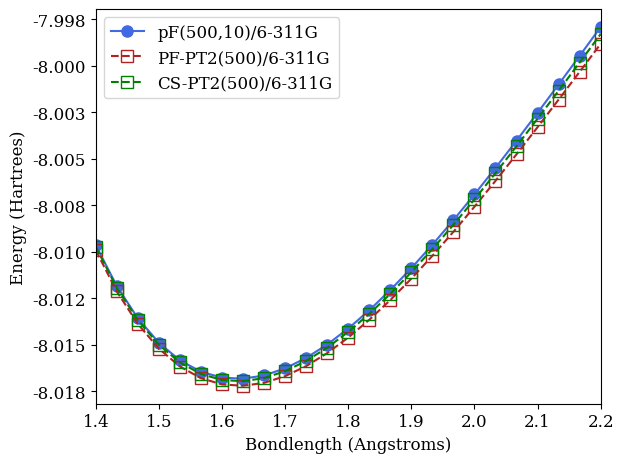

In [140]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import json
from matplotlib import cm
from matplotlib import rcParams


rcParams['font.family'] = 'serif'
rcParams['font.size'] = 12
# define color palette
COLOUR1 = "firebrick"
COLOUR2 = "green"
COLOUR3 = "royalblue"
COLOUR4 = "rebeccapurple"
COLOUR5 = 'darkorchid'
COLOUR6 = 'olivedrab'

COLOUR7 = 'violet'
COLOUR8 = 'yellow'


# Update to current figure 7 that excludes the coherent state data


# plt.plot(d_array,_pcqed_1002_dse[:,0], color=COLOUR1, marker="s", ms="7", mfc="none", label='pPF(500,2)/6-311G')
# plt.plot(d_array, _pcqed_50010_dse[:,0],color=COLOUR2, marker="s", ms="7", mfc="none", label='pPF(500,10)/6-311G')
# plt.plot(d_array,_pcqed_10021_dse_cs[:,0], color=COLOUR5, marker="^", ms="7", label='pCS(500,2)/6-311G')

#plt.plot(d_array,_pcqed_1002_dse[:,0], color=COLOUR1, marker="s", ms="7", mfc="none", label='pF(500,2)/6-311G')
plt.plot(d_array, _pcqed_50010[:,0],color=COLOUR3, linestyle="solid", marker="o", ms="8",mfc=COLOUR3, label='pF(500,10)/6-311G')


plt.plot(d_array,energies_pt2,color=COLOUR1, linestyle="dashed", marker="s", ms="8", mfc="none", label='PF-PT2(500)/6-311G')
#plt.plot(d_array,energies_pt3,color=COLOUR6, marker="s", ms="7", mfc="none", label='PF-PT3(500)/6-311G')


plt.plot(d_array,energies_pt2_cs, color=COLOUR2, linestyle="dashed", marker="s", ms="8", mfc="none",  label='CS-PT2(500)/6-311G')
#plt.plot(d_array,energies_pt3_cs,color=COLOUR3, marker="s", ms="7", mfc="none", label='CS-PT3(500)/6-311G')

plt.legend()
plt.xlabel("Bondlength (Angstroms)")
plt.ylabel("Energy (Hartrees)")
plt.xlim(1.4, 2.2)
# plt.ylim(-7.9970, -7.9966)
# rcParams['font.family'] = 'serif'
# rcParams['font.size'] = 12
plt.gca().yaxis.set_major_formatter('{:.3f}'.format)

plt.tight_layout()
#plt.savefig("LiH_bondstretch_pt_and_PCQED_PT2.png", dpi=200)
plt.show()





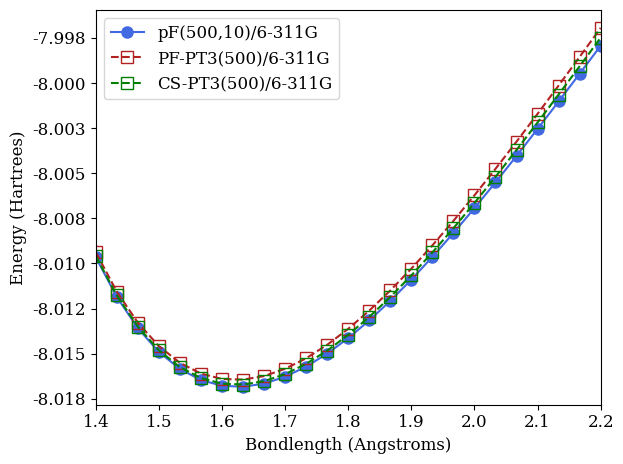

In [141]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import json
from matplotlib import cm
from matplotlib import rcParams


rcParams['font.family'] = 'serif'
rcParams['font.size'] = 12
# define color palette
COLOUR1 = "firebrick"
COLOUR2 = "green"
COLOUR3 = "royalblue"
COLOUR4 = "rebeccapurple"
COLOUR5 = 'darkorchid'
COLOUR6 = 'olivedrab'

COLOUR7 = 'violet'
COLOUR8 = 'yellow'


# Update to current figure 7 that excludes the coherent state data


# plt.plot(d_array,_pcqed_1002_dse[:,0], color=COLOUR1, marker="s", ms="7", mfc="none", label='pPF(500,2)/6-311G')
# plt.plot(d_array, _pcqed_50010_dse[:,0],color=COLOUR2, marker="s", ms="7", mfc="none", label='pPF(500,10)/6-311G')
# plt.plot(d_array,_pcqed_10021_dse_cs[:,0], color=COLOUR5, marker="^", ms="7", label='pCS(500,2)/6-311G')

#plt.plot(d_array,_pcqed_1002_dse[:,0], color=COLOUR1, marker="s", ms="7", mfc="none", label='pF(500,2)/6-311G')
plt.plot(d_array, _pcqed_50010[:,0],color=COLOUR3, linestyle="solid", marker="o", ms="8",mfc=COLOUR3,label='pF(500,10)/6-311G')


#plt.plot(d_array,energies_pt2, color=COLOUR7, marker="s", ms="7", mfc="none", label='PF-PT2(500)/6-311G')
plt.plot(d_array,energies_pt3,color=COLOUR1, linestyle="dashed", marker="s", ms="8", mfc="none", label='PF-PT3(500)/6-311G')


#plt.plot(d_array,energies_pt2_cs, color=COLOUR1, marker="s", ms="7", mfc="none", label='CS-PT2(500)/6-311G')
plt.plot(d_array,energies_pt3_cs,color=COLOUR2, linestyle="dashed", marker="s", ms="8", mfc="none", label='CS-PT3(500)/6-311G')


plt.legend()
plt.xlabel("Bondlength (Angstroms)")
plt.ylabel("Energy (Hartrees)")
plt.xlim(1.4, 2.2)
# plt.ylim(-7.9970, -7.9966)
# rcParams['font.family'] = 'serif'
# rcParams['font.size'] = 12
plt.gca().yaxis.set_major_formatter('{:.3f}'.format)

plt.tight_layout()
plt.show()



In [142]:
print(energies_pt4)
print(energies_pt4_cs)

[-8.00926529496576, -8.0114485391147, -8.01316284405167, -8.01445878007318, -8.01538176122058, -8.015972630876062, -8.016268354191102, -8.016301866240422, -8.016102544147323, -8.015696879196659, -8.015110818001599, -8.01436571599592, -8.013480321224204, -8.012472625302383, -8.011359466830719, -8.010155239151532, -8.008871083581775, -8.007520588084995, -8.006117956722166, -8.00466365611128, -8.003171816108683, -8.001648743637611, -8.000102094622948, -7.9985381400889235, -7.996962505156254]
[-8.009667964133946, -8.011870584205221, -8.013605288056807, -8.014922677865107, -8.01586812004919, -8.016482581809834, -8.016802787108, -8.01686188359124, -8.016689945105972, -8.016313580108616, -8.01575678933688, -8.015041693213158, -8.01418779680643, -8.013213059157223, -8.01213346996688, -8.010963541924939, -8.009716053011909, -8.008402935854486, -8.007034803598913, -8.00562057127848, -8.00416962638061, -8.00268863993158, -8.001184911803975, -7.99966461026765, -7.998133250130534]


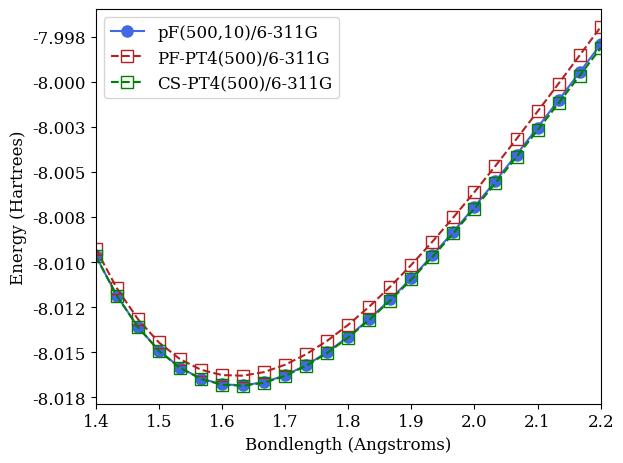

In [143]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import json
from matplotlib import cm
from matplotlib import rcParams


rcParams['font.family'] = 'serif'
rcParams['font.size'] = 12
# define color palette
COLOUR1 = "firebrick"
COLOUR2 = "green"
COLOUR3 = "royalblue"
COLOUR4 = "rebeccapurple"
COLOUR5 = 'darkorchid'
COLOUR6 = 'olivedrab'

COLOUR7 = 'violet'
COLOUR8 = 'yellow'


# Update to current figure 7 that excludes the coherent state data


# plt.plot(d_array,_pcqed_1002_dse[:,0], color=COLOUR1, marker="s", ms="7", mfc="none", label='pPF(500,2)/6-311G')
# plt.plot(d_array, _pcqed_50010_dse[:,0],color=COLOUR2, marker="s", ms="7", mfc="none", label='pPF(500,10)/6-311G')
# plt.plot(d_array,_pcqed_10021_dse_cs[:,0], color=COLOUR5, marker="^", ms="7", label='pCS(500,2)/6-311G')

#plt.plot(d_array,_pcqed_1002_dse[:,0], color=COLOUR1, marker="s", ms="7", mfc="none", label='pF(500,2)/6-311G')
plt.plot(d_array, _pcqed_50010[:,0],color=COLOUR3, linestyle="solid", marker="o", ms="8",mfc=COLOUR3,label='pF(500,10)/6-311G')


#plt.plot(d_array,energies_pt2, color=COLOUR7, marker="s", ms="7", mfc="none", label='PF-PT2(500)/6-311G')
plt.plot(d_array,energies_pt4,color=COLOUR1, linestyle="dashed", marker="s", ms="8", mfc="none", label='PF-PT4(500)/6-311G')


#plt.plot(d_array,energies_pt2_cs, color=COLOUR1, marker="s", ms="7", mfc="none", label='CS-PT2(500)/6-311G')
plt.plot(d_array,energies_pt4_cs,color=COLOUR2, linestyle="dashed", marker="s", ms="8", mfc="none", label='CS-PT4(500)/6-311G')


plt.legend()
plt.xlabel("Bondlength (Angstroms)")
plt.ylabel("Energy (Hartrees)")
plt.xlim(1.4, 2.2)
# plt.ylim(-7.9970, -7.9966)
# rcParams['font.family'] = 'serif'
# rcParams['font.size'] = 12
plt.gca().yaxis.set_major_formatter('{:.3f}'.format)

plt.tight_layout()
plt.show()

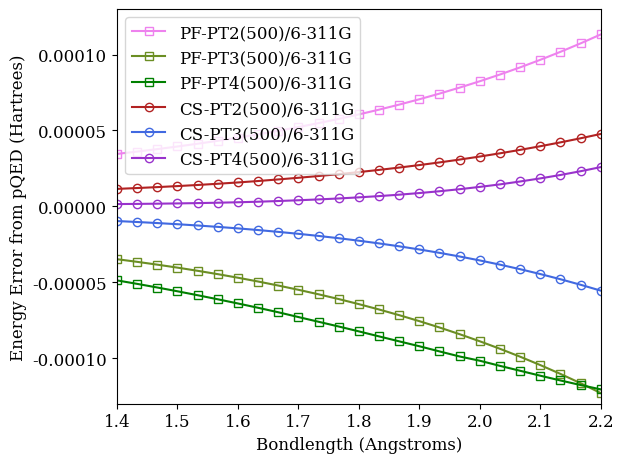

In [144]:
#plt.plot(r_data, eig_np10_005_dse[:,0],  color=COLOUR3, marker="o", ms="7", label='PF-FCI-10/6-311G')


#plt.plot(d_array,_pcqed_1002_dse[:,0], color=COLOUR1, marker="s", ms="7", mfc="none", label='pF(500,2)/6-311G')

plt.plot(d_array,(energies_pt2 - _pcqed_50010[:,0])/_pcqed_50010[:,0] , color=COLOUR7, marker="s", ms="6", mfc="none", label='PF-PT2(500)/6-311G')
plt.plot(d_array,( energies_pt3 - _pcqed_50010[:,0])/_pcqed_50010[:,0] ,color=COLOUR6, marker="s", ms="6", mfc="none", label='PF-PT3(500)/6-311G')
plt.plot(d_array,( energies_pt4 - _pcqed_50010[:,0])/_pcqed_50010[:,0] ,color=COLOUR2, marker="s", ms="6", mfc="none", label='PF-PT4(500)/6-311G')



plt.plot(d_array,( energies_pt2_cs - _pcqed_50010[:,0] )/_pcqed_50010[:,0], color=COLOUR1, marker="o", ms="6", mfc="none", label='CS-PT2(500)/6-311G')
plt.plot(d_array,(energies_pt3_cs - _pcqed_50010[:,0])/_pcqed_50010[:,0],color=COLOUR3, marker="o", ms="6", mfc="none", label='CS-PT3(500)/6-311G')
plt.plot(d_array,(energies_pt4_cs - _pcqed_50010[:,0])/_pcqed_50010[:,0],color=COLOUR5, marker="o", ms="6", mfc="none", label='CS-PT4(500)/6-311G')




plt.legend()
plt.xlabel("Bondlength (Angstroms)")
plt.ylabel("Energy Error from pQED (Hartrees)")
plt.xlim(1.4, 2.2)

plt.ylim(-0.00013,0.00013)
# rcParams['font.family'] = 'serif'
# rcParams['font.size'] = 12
plt.gca().yaxis.set_major_formatter('{:.5f}'.format)

plt.tight_layout()
plt.show()

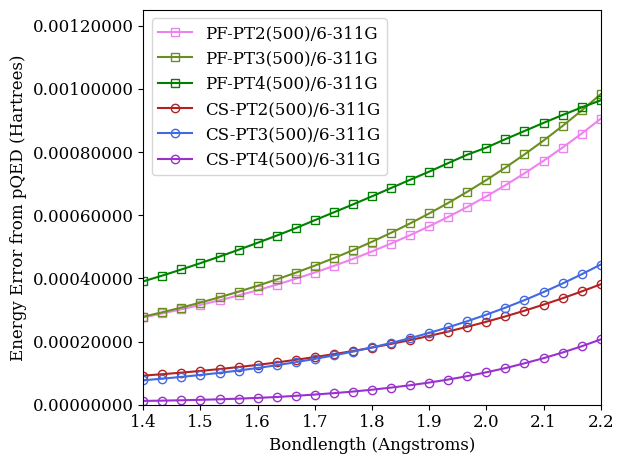

In [145]:
#plt.plot(r_data, eig_np10_005_dse[:,0],  color=COLOUR3, marker="o", ms="7", label='PF-FCI-10/6-311G')


#plt.plot(d_array,_pcqed_1002_dse[:,0], color=COLOUR1, marker="s", ms="7", mfc="none", label='pF(500,2)/6-311G')

plt.plot(d_array,np.abs(energies_pt2 - _pcqed_50010[:,0]), color=COLOUR7, marker="s", ms="6", mfc="none", label='PF-PT2(500)/6-311G')
plt.plot(d_array,np.abs( energies_pt3 - _pcqed_50010[:,0]) ,color=COLOUR6, marker="s", ms="6", mfc="none", label='PF-PT3(500)/6-311G')
plt.plot(d_array,np.abs( energies_pt4 - _pcqed_50010[:,0]) ,color=COLOUR2, marker="s", ms="6", mfc="none", label='PF-PT4(500)/6-311G')


plt.plot(d_array,np.abs( energies_pt2_cs - _pcqed_50010[:,0] ), color=COLOUR1, marker="o", ms="6", mfc="none", label='CS-PT2(500)/6-311G')
plt.plot(d_array,np.abs(energies_pt3_cs - _pcqed_50010[:,0]),color=COLOUR3, marker="o", ms="6", mfc="none", label='CS-PT3(500)/6-311G')
plt.plot(d_array,np.abs(energies_pt4_cs - _pcqed_50010[:,0]),color=COLOUR5, marker="o", ms="6", mfc="none", label='CS-PT4(500)/6-311G')




plt.legend()
plt.xlabel("Bondlength (Angstroms)")
plt.ylabel("Energy Error from pQED (Hartrees)")
plt.xlim(1.4, 2.2)

plt.ylim(-0.000000,0.00125)
# rcParams['font.family'] = 'serif'
# rcParams['font.size'] = 12
plt.gca().yaxis.set_major_formatter('{:.8f}'.format)

plt.tight_layout()
plt.show()

In [146]:
index=[ "PF-PT2(500)", "PF-PT3(500)","CS-PT2(500)","CS-PT3(500)"]


data = [
    np.average((energies_pt2 - _pcqed_50010[:,0])**2),
    np.average(( energies_pt3 - _pcqed_50010[:,0] )**2) ,
    np.average(( energies_pt2_cs - _pcqed_50010[:,0] )**2),
    np.average((energies_pt3_cs - _pcqed_50010[:,0])**2)
    ]


In [147]:
print(energies_pt3_cs - _pcqed_50010[:,0])
print(energies_pt2_cs - _pcqed_50010[:,0])

[7.74351950e-05 8.25403285e-05 8.81449950e-05 9.42865890e-05
 1.01006152e-04 1.08347474e-04 1.16355641e-04 1.25076719e-04
 1.34701405e-04 1.44986208e-04 1.56145292e-04 1.68134588e-04
 1.81343055e-04 1.95518318e-04 2.10840648e-04 2.27385457e-04
 2.45230167e-04 2.64453463e-04 2.85134330e-04 3.07350838e-04
 3.31178635e-04 3.56689110e-04 3.83947198e-04 4.13008765e-04
 4.43917562e-04]
[-9.21785494e-05 -9.66802590e-05 -1.01620146e-04 -1.07022684e-04
 -1.12915305e-04 -1.19325729e-04 -1.26278223e-04 -1.33793116e-04
 -1.42244481e-04 -1.50914576e-04 -1.60228502e-04 -1.69971224e-04
 -1.80939548e-04 -1.92416542e-04 -2.04697031e-04 -2.17824611e-04
 -2.31843905e-04 -2.46800139e-04 -2.62738595e-04 -2.79703924e-04
 -2.97739296e-04 -3.16885384e-04 -3.37179151e-04 -3.58652425e-04
 -3.81330242e-04]


             Mean Squared Error
PF-PT2(500)        3.088118e-07
PF-PT3(500)        3.545812e-07
CS-PT2(500)        4.783482e-08
CS-PT3(500)        5.589920e-08


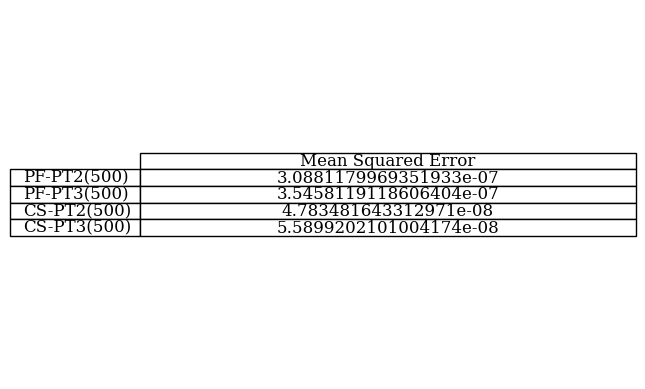

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(data = data, index = index, columns = ['Mean Squared Error'])

fix, ax = plt.subplots()
ax.axis('off')
table = pd.plotting.table(ax, df, loc='center',
                          cellLoc='center', colWidths=list([1, 1]))

print(df)

In [149]:
N_R = 25

d_array = np.linspace(1.4, 2.2, N_R)
N_l = len(d_array)
N_el = 250
N_ph = 10
omega = 0.12086
lambda_vector = np.array([0, 0, 0.01])

# create an array of zeros to store the PCQED eigenvalues for each value of d
_pcqed_50010 = np.zeros((N_l, N_el * N_ph))
# loop over values of d, build Hamiltonian, capture eigenvalues
ctr = 0
for d in d_array:
    instance= PQED(E_array[:,ctr], Mu_array[:,:,:,ctr])  # E_array[:,ctr]: 20 energy values for fisrt displacement and so on... 
    _pcqed_50010[ctr, :]  = instance.PQED_Hamiltonian(N_el, N_ph, omega, lambda_vector)[0]

    print(_pcqed_50010[ctr, 0])
    ctr += 1

-8.012092410927094
-8.014333614420318
-8.01610593030743
-8.01745993117025
-8.018441044531214
-8.019090106903858
-8.019443852787719
-8.019535346310626
-8.019394360376177
-8.019047725943139
-8.018519611442077
-8.017831804239652
-8.01700393996484
-8.016053714117447
-8.014997066860772
-8.013848351605487
-8.012620485424607
-8.011325085082618
-8.009972590391893
-8.008572376522952
-8.007132856614827
-8.005661575781543
-8.00416529739492
-8.002650082335578
-8.00112136175832


In [150]:
n_elec = 250
ctr = 0
mu_n = 0
m_n = 0

energies_pt2 = []
energies_pt3 = []
energies_pt4 = []




for d in d_array:

    energies  = E_array[:,ctr]
    dipoles =  Mu_array[:,:,:,ctr]


    p =  non_degen_pt( energies, dipoles , lambda_vector, omega, n_elec, mu_n, m_n,)

    energies_pt2.append(p.calc_energy_correction_to_second_order())
    energies_pt3.append(p.calc_energy_correction_to_third_order())
    energies_pt4.append(p.calc_energy_correction_to_fourth_order())

    print(energies_pt2[ctr])
    print(energies_pt3[ctr])
    print(energies_pt4[ctr])

    ctr += 1

energies_pt2 = np.array(energies_pt2)
energies_pt3 = np.array(energies_pt3)

In [ ]:
n_elec = 250
ctr = 0
mu_n = 0
m_n = 0

energies_pt2_cs= []
energies_pt3_cs = []
energies_pt4_cs = []






for d in d_array:

    energies  = E_array[:,ctr]
    dipoles =  Mu_array[:,:,:,ctr]


    p =  non_degen_pt( energies, dipoles , lambda_vector, omega, n_elec, mu_n, m_n, coherent_state=True)
    energies_pt2_cs.append(p.calc_energy_correction_to_second_order())
    energies_pt3_cs.append(p.calc_energy_correction_to_third_order())
    energies_pt4_cs.append(p.calc_energy_correction_to_fourth_order())



    ctr += 1


energies_pt2_cs = np.array(energies_pt2_cs)
energies_pt3_cs = np.array(energies_pt3_cs)

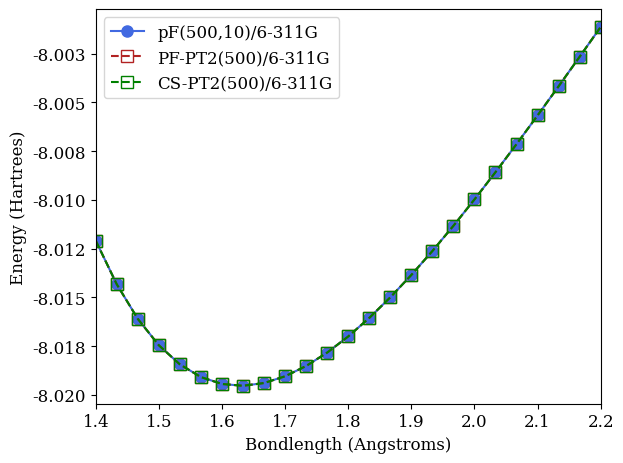

In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import json
from matplotlib import cm
from matplotlib import rcParams


rcParams['font.family'] = 'serif'
rcParams['font.size'] = 12
# define color palette
COLOUR1 = "firebrick"
COLOUR2 = "green"
COLOUR3 = "royalblue"
COLOUR4 = "rebeccapurple"
COLOUR5 = 'darkorchid'
COLOUR6 = 'olivedrab'

COLOUR7 = 'violet'
COLOUR8 = 'yellow'


# Update to current figure 7 that excludes the coherent state data


# plt.plot(d_array,_pcqed_1002_dse[:,0], color=COLOUR1, marker="s", ms="7", mfc="none", label='pPF(500,2)/6-311G')
# plt.plot(d_array, _pcqed_50010_dse[:,0],color=COLOUR2, marker="s", ms="7", mfc="none", label='pPF(500,10)/6-311G')
# plt.plot(d_array,_pcqed_10021_dse_cs[:,0], color=COLOUR5, marker="^", ms="7", label='pCS(500,2)/6-311G')

#plt.plot(d_array,_pcqed_1002_dse[:,0], color=COLOUR1, marker="s", ms="7", mfc="none", label='pF(500,2)/6-311G')
plt.plot(d_array, _pcqed_50010[:,0],color=COLOUR3, linestyle="solid", marker="o", ms="8",mfc=COLOUR3, label='pF(500,10)/6-311G')


plt.plot(d_array,energies_pt2,color=COLOUR1, linestyle="dashed", marker="s", ms="8", mfc="none", label='PF-PT2(500)/6-311G')
#plt.plot(d_array,energies_pt3,color=COLOUR6, marker="s", ms="7", mfc="none", label='PF-PT3(500)/6-311G')


plt.plot(d_array,energies_pt2_cs, color=COLOUR2, linestyle="dashed", marker="s", ms="8", mfc="none",  label='CS-PT2(500)/6-311G')
#plt.plot(d_array,energies_pt3_cs,color=COLOUR3, marker="s", ms="7", mfc="none", label='CS-PT3(500)/6-311G')

plt.legend()
plt.xlabel("Bondlength (Angstroms)")
plt.ylabel("Energy (Hartrees)")
plt.xlim(1.4, 2.2)
# plt.ylim(-7.9970, -7.9966)
# rcParams['font.family'] = 'serif'
# rcParams['font.size'] = 12
plt.gca().yaxis.set_major_formatter('{:.3f}'.format)

plt.tight_layout()
#plt.savefig("LiH_bondstretch_pt_and_PCQED_PT2.png", dpi=200)
plt.show()


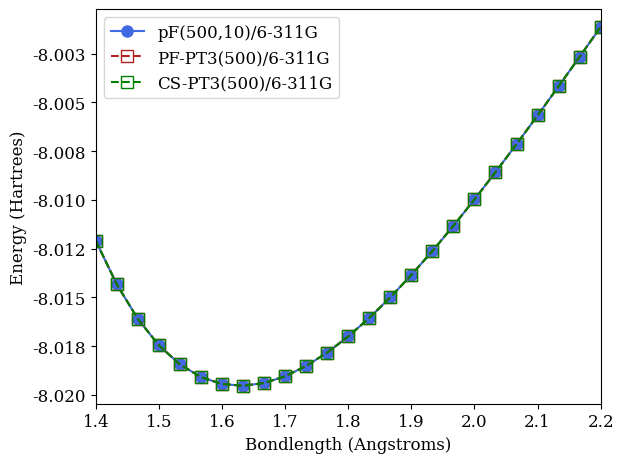

In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import json
from matplotlib import cm
from matplotlib import rcParams


rcParams['font.family'] = 'serif'
rcParams['font.size'] = 12
# define color palette
COLOUR1 = "firebrick"
COLOUR2 = "green"
COLOUR3 = "royalblue"
COLOUR4 = "rebeccapurple"
COLOUR5 = 'darkorchid'
COLOUR6 = 'olivedrab'

COLOUR7 = 'violet'
COLOUR8 = 'yellow'


# Update to current figure 7 that excludes the coherent state data


# plt.plot(d_array,_pcqed_1002_dse[:,0], color=COLOUR1, marker="s", ms="7", mfc="none", label='pPF(500,2)/6-311G')
# plt.plot(d_array, _pcqed_50010_dse[:,0],color=COLOUR2, marker="s", ms="7", mfc="none", label='pPF(500,10)/6-311G')
# plt.plot(d_array,_pcqed_10021_dse_cs[:,0], color=COLOUR5, marker="^", ms="7", label='pCS(500,2)/6-311G')

#plt.plot(d_array,_pcqed_1002_dse[:,0], color=COLOUR1, marker="s", ms="7", mfc="none", label='pF(500,2)/6-311G')
plt.plot(d_array, _pcqed_50010[:,0],color=COLOUR3, linestyle="solid", marker="o", ms="8",mfc=COLOUR3,label='pF(500,10)/6-311G')


#plt.plot(d_array,energies_pt2, color=COLOUR7, marker="s", ms="7", mfc="none", label='PF-PT2(500)/6-311G')
plt.plot(d_array,energies_pt3,color=COLOUR1, linestyle="dashed", marker="s", ms="8", mfc="none", label='PF-PT3(500)/6-311G')


#plt.plot(d_array,energies_pt2_cs, color=COLOUR1, marker="s", ms="7", mfc="none", label='CS-PT2(500)/6-311G')
plt.plot(d_array,energies_pt3_cs,color=COLOUR2, linestyle="dashed", marker="s", ms="8", mfc="none", label='CS-PT3(500)/6-311G')


plt.legend()
plt.xlabel("Bondlength (Angstroms)")
plt.ylabel("Energy (Hartrees)")
plt.xlim(1.4, 2.2)
# plt.ylim(-7.9970, -7.9966)
# rcParams['font.family'] = 'serif'
# rcParams['font.size'] = 12
plt.gca().yaxis.set_major_formatter('{:.3f}'.format)

plt.tight_layout()
plt.show()


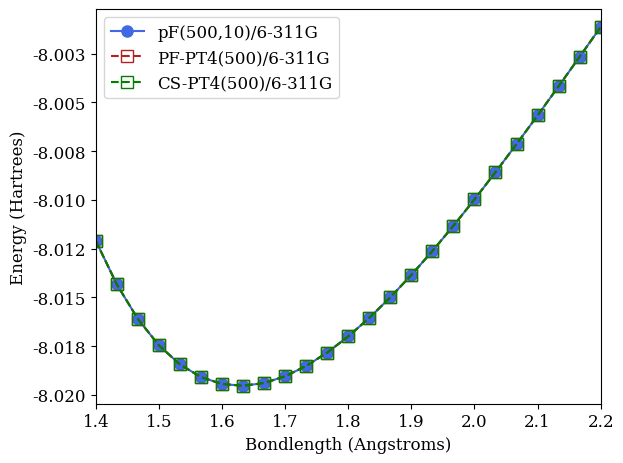

In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import json
from matplotlib import cm
from matplotlib import rcParams


rcParams['font.family'] = 'serif'
rcParams['font.size'] = 12
# define color palette
COLOUR1 = "firebrick"
COLOUR2 = "green"
COLOUR3 = "royalblue"
COLOUR4 = "rebeccapurple"
COLOUR5 = 'darkorchid'
COLOUR6 = 'olivedrab'

COLOUR7 = 'violet'
COLOUR8 = 'yellow'


# Update to current figure 7 that excludes the coherent state data


# plt.plot(d_array,_pcqed_1002_dse[:,0], color=COLOUR1, marker="s", ms="7", mfc="none", label='pPF(500,2)/6-311G')
# plt.plot(d_array, _pcqed_50010_dse[:,0],color=COLOUR2, marker="s", ms="7", mfc="none", label='pPF(500,10)/6-311G')
# plt.plot(d_array,_pcqed_10021_dse_cs[:,0], color=COLOUR5, marker="^", ms="7", label='pCS(500,2)/6-311G')

#plt.plot(d_array,_pcqed_1002_dse[:,0], color=COLOUR1, marker="s", ms="7", mfc="none", label='pF(500,2)/6-311G')
plt.plot(d_array, _pcqed_50010[:,0],color=COLOUR3, linestyle="solid", marker="o", ms="8",mfc=COLOUR3,label='pF(500,10)/6-311G')


#plt.plot(d_array,energies_pt2, color=COLOUR7, marker="s", ms="7", mfc="none", label='PF-PT2(500)/6-311G')
plt.plot(d_array,energies_pt4,color=COLOUR1, linestyle="dashed", marker="s", ms="8", mfc="none", label='PF-PT4(500)/6-311G')


#plt.plot(d_array,energies_pt2_cs, color=COLOUR1, marker="s", ms="7", mfc="none", label='CS-PT2(500)/6-311G')
plt.plot(d_array,energies_pt4_cs,color=COLOUR2, linestyle="dashed", marker="s", ms="8", mfc="none", label='CS-PT4(500)/6-311G')


plt.legend()
plt.xlabel("Bondlength (Angstroms)")
plt.ylabel("Energy (Hartrees)")
plt.xlim(1.4, 2.2)
# plt.ylim(-7.9970, -7.9966)
# rcParams['font.family'] = 'serif'
# rcParams['font.size'] = 12
plt.gca().yaxis.set_major_formatter('{:.3f}'.format)

plt.tight_layout()
plt.show()

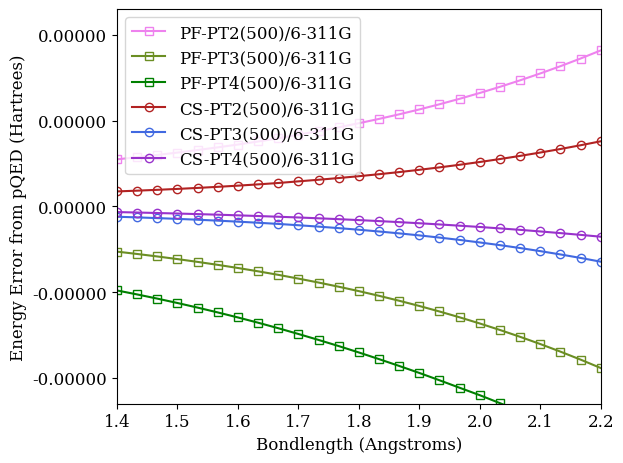

In [ ]:
#plt.plot(r_data, eig_np10_005_dse[:,0],  color=COLOUR3, marker="o", ms="7", label='PF-FCI-10/6-311G')


#plt.plot(d_array,_pcqed_1002_dse[:,0], color=COLOUR1, marker="s", ms="7", mfc="none", label='pF(500,2)/6-311G')

plt.plot(d_array,(energies_pt2 - _pcqed_50010[:,0])/_pcqed_50010[:,0] , color=COLOUR7, marker="s", ms="6", mfc="none", label='PF-PT2(500)/6-311G')
plt.plot(d_array,( energies_pt3 - _pcqed_50010[:,0])/_pcqed_50010[:,0] ,color=COLOUR6, marker="s", ms="6", mfc="none", label='PF-PT3(500)/6-311G')
plt.plot(d_array,( energies_pt4 - _pcqed_50010[:,0])/_pcqed_50010[:,0] ,color=COLOUR2, marker="s", ms="6", mfc="none", label='PF-PT4(500)/6-311G')



plt.plot(d_array,( energies_pt2_cs - _pcqed_50010[:,0] )/_pcqed_50010[:,0], color=COLOUR1, marker="o", ms="6", mfc="none", label='CS-PT2(500)/6-311G')
plt.plot(d_array,(energies_pt3_cs - _pcqed_50010[:,0])/_pcqed_50010[:,0],color=COLOUR3, marker="o", ms="6", mfc="none", label='CS-PT3(500)/6-311G')
plt.plot(d_array,(energies_pt4_cs - _pcqed_50010[:,0])/_pcqed_50010[:,0],color=COLOUR5, marker="o", ms="6", mfc="none", label='CS-PT4(500)/6-311G')




plt.legend()
plt.xlabel("Bondlength (Angstroms)")
plt.ylabel("Energy Error from pQED (Hartrees)")
plt.xlim(1.4, 2.2)

plt.ylim(-0.00000023,0.00000023)
# rcParams['font.family'] = 'serif'
# rcParams['font.size'] = 12
plt.gca().yaxis.set_major_formatter('{:.5f}'.format)

plt.tight_layout()
plt.show()

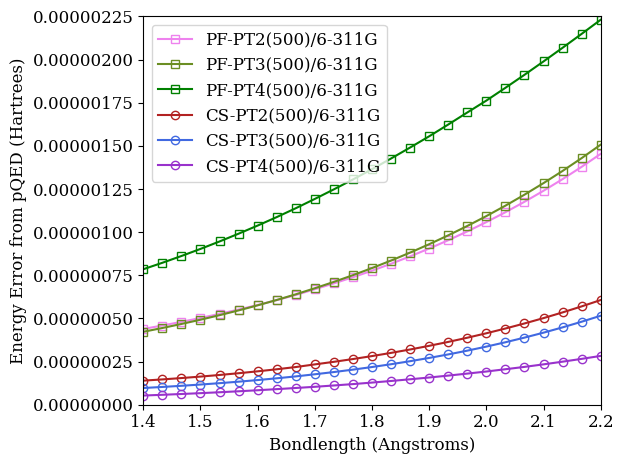

In [ ]:
#plt.plot(r_data, eig_np10_005_dse[:,0],  color=COLOUR3, marker="o", ms="7", label='PF-FCI-10/6-311G')


#plt.plot(d_array,_pcqed_1002_dse[:,0], color=COLOUR1, marker="s", ms="7", mfc="none", label='pF(500,2)/6-311G')

plt.plot(d_array,np.abs(energies_pt2 - _pcqed_50010[:,0]), color=COLOUR7, marker="s", ms="6", mfc="none", label='PF-PT2(500)/6-311G')
plt.plot(d_array,np.abs( energies_pt3 - _pcqed_50010[:,0]) ,color=COLOUR6, marker="s", ms="6", mfc="none", label='PF-PT3(500)/6-311G')
plt.plot(d_array,np.abs( energies_pt4 - _pcqed_50010[:,0]) ,color=COLOUR2, marker="s", ms="6", mfc="none", label='PF-PT4(500)/6-311G')


plt.plot(d_array,np.abs( energies_pt2_cs - _pcqed_50010[:,0] ), color=COLOUR1, marker="o", ms="6", mfc="none", label='CS-PT2(500)/6-311G')
plt.plot(d_array,np.abs(energies_pt3_cs - _pcqed_50010[:,0]),color=COLOUR3, marker="o", ms="6", mfc="none", label='CS-PT3(500)/6-311G')
plt.plot(d_array,np.abs(energies_pt4_cs - _pcqed_50010[:,0]),color=COLOUR5, marker="o", ms="6", mfc="none", label='CS-PT4(500)/6-311G')




plt.legend()
plt.xlabel("Bondlength (Angstroms)")
plt.ylabel("Energy Error from pQED (Hartrees)")
plt.xlim(1.4, 2.2)

plt.ylim(-0.000000,0.00000225)
# rcParams['font.family'] = 'serif'
# rcParams['font.size'] = 12
plt.gca().yaxis.set_major_formatter('{:.8f}'.format)

plt.tight_layout()
plt.show()